In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('E:/Imarticus/Semester 2/Machine learning Python/Kmeans project/2 Project-K-means clustering/2 Project/K-means/Dataset/cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [4]:
miss_values = df.isnull().sum()
miss_values[miss_values > 0]

Gender    2724
dtype: int64

In [7]:
df.Gender.fillna('O', inplace = True)

In [8]:
df_copy = df.copy(deep = True)

In [9]:
df['Total_search'] = df.iloc[:,3:-1].apply(np.sum, axis = 1)

In [13]:
df.drop(['Cust_ID'], axis = 1, inplace = True)

In [14]:
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_search
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
1,F,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,O,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,15


In [19]:
df['Gender'] = df.Gender.replace({'F':0 ,'M':1 ,'O':2})

In [20]:
X = df.iloc[:,[0,1,-1]]

In [22]:
X.head()

,Gender,Orders,Total_search
0,1,7,2
1,0,0,18
2,1,7,5
3,0,0,2
4,2,10,15


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Total Searches vs Orders by Gender')

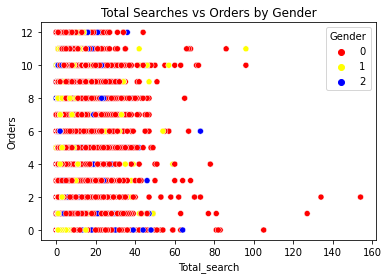

In [27]:
sns.scatterplot(x='Total_search', y = 'Orders', hue = 'Gender', data = df, palette = ['red','yellow','blue'])
plt.title('Total Searches vs Orders by Gender')


In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

In [31]:
from sklearn.cluster import KMeans

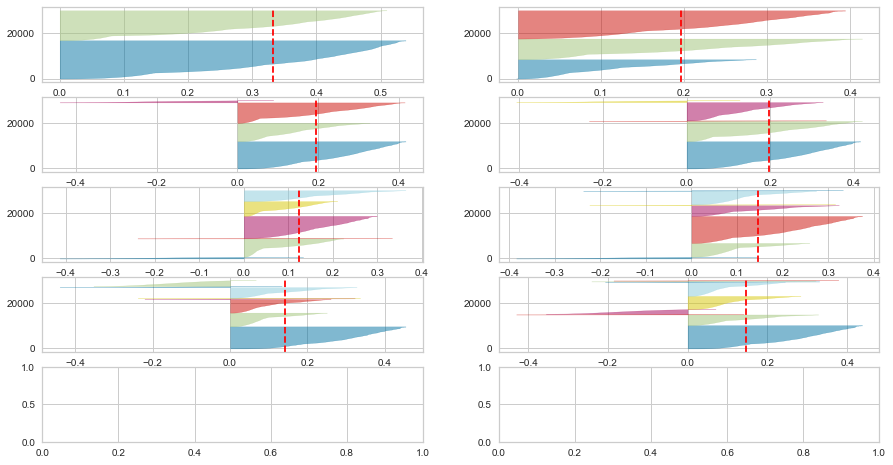

In [51]:
fig, ax = plt.subplots(5,2, figsize=(15,8))
for i in range(2,10):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter = 100, random_state=42)
    q, mod = divmod(i,2)
    visualizer = SilhouetteVisualizer(km, colors ='yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

In [33]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(max_iter=100, n_clusters=9, random_state=42),
                 k=(2, 10))

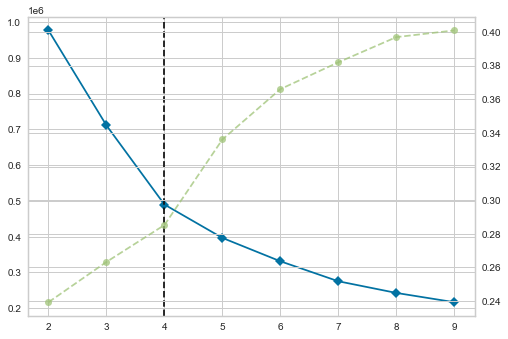

In [34]:
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(X)

In [41]:
from sklearn.metrics import silhouette_score

In [39]:
km = KMeans(n_clusters = 2, random_state = 10)
km.fit(X)

KMeans(n_clusters=2, random_state=10)

In [42]:
silhouette_score(X, km.labels_)

0.5440769166431331

In [44]:
X = df.iloc[:,0:-1]
X.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [45]:
km = KMeans(n_clusters = 2, random_state = 10)
km.fit(X)

KMeans(n_clusters=2, random_state=10)

In [46]:
silhouette_score(X, km.labels_)

0.33201203455688477

In [ ]:
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state = 10)
    kmeans.fit(X)
    print("SH Score for {} is {}".format(k, silhouette_score(X, km.labels_)))

SH Score for 2 is 0.14662195239168135
SH Score for 3 is 0.14662195239168135
SH Score for 4 is 0.14662195239168135
SH Score for 5 is 0.14662195239168135
SH Score for 6 is 0.14662195239168135
SH Score for 7 is 0.14662195239168135
SH Score for 8 is 0.14662195239168135
SH Score for 9 is 0.14662195239168135
SH Score for 10 is 0.14662195239168135
SH Score for 11 is 0.14662195239168135
SH Score for 12 is 0.14662195239168135
SH Score for 13 is 0.14662195239168135
SH Score for 14 is 0.14662195239168135
SH Score for 15 is 0.14662195239168135


In [ ]:
x1 = df.iloc[:,[0,1,-1]]

In [ ]:
km = KMeans(n_clusters = 2, random_state = 10)
km.fit(X1)

In [ ]:
silhouette_score(X1, km.labels_)

In [ ]:
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state = 10)
    kmeans.fit(X1)
    print("SH Score for {} is {}".format(k, silhouette_score(X, km.labels_)))